Basic Exploration

Load the CSV into pandas.

In [2]:
import pandas as pd 

In [6]:
%pwd

'c:\\Users\\USER\\Desktop\\python\\data_analysis_with_python'

In [8]:
sale = pd.read_csv("../DATA/sales_data.csv")

Check the first 10 rows.

In [9]:
sale.head(10)

,TransactionID,CustomerID,Product,Quantity,Price_per_Unit,Date,TotalAmount
0,1,1006,Headphones,4,677,2025-01-01,2708
1,2,1019,Phone,2,781,2025-01-02,1562
2,3,1014,Phone,3,656,2025-01-03,1968
3,4,1010,Headphones,3,673,2025-01-04,2019
4,5,1007,Charger,1,745,2025-01-05,745
5,6,1006,Phone,3,895,2025-01-06,2685
6,7,1018,Phone,1,127,2025-01-07,127
7,8,1010,Headphones,3,719,2025-01-08,2157
8,9,1010,Phone,2,655,2025-01-09,1310
9,10,1003,Phone,3,439,2025-01-10,1317


Get the number of rows and columns.

In [11]:
sale.shape

(50, 7)

Find missing values (if any)

In [15]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   50 non-null     int64 
 1   CustomerID      50 non-null     int64 
 2   Product         50 non-null     object
 3   Quantity        50 non-null     int64 
 4   Price_per_Unit  50 non-null     int64 
 5   Date            50 non-null     object
 6   TotalAmount     50 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.9+ KB


Descriptive Statistics

Find the average TotalAmount.



In [22]:
import numpy as np
Avg_TotalAmount = np.average(sale["TotalAmount"])

print(f"Total Amount Average is: {Avg_TotalAmount}")

Total Amount Average is: 1546.18


Find the most frequently purchased product.

In [33]:
sale.groupby("Product", as_index=False, sort=False)["Quantity"].sum()

,Product,Quantity
0,Headphones,36
1,Phone,28
2,Charger,20
3,Laptop,30
4,Tablet,13


What is the highest TotalAmount in a single transaction?

In [38]:
Highest_transaction = sale["TotalAmount"].max()

print(f"Highest single transaction: {Highest_transaction}")

Highest single transaction: 3236


Customer Insights

Which customer spent the most in total?

In [61]:
Customer_most_spent = sale.groupby("CustomerID", as_index=False)["TotalAmount"].sum()
print(Customer_most_spent.sort_values("TotalAmount", ascending=False).head())

# Customer_most_spent = sale.groupby("CustomerID", as_index=False, sort=False)["TotalAmount"].sum()

# Customer_most_spent.head()

    CustomerID  TotalAmount
6         1006        12196
13        1014        11817
11        1011         6364
16        1017         6297
10        1010         5486


How many unique customers are in the dataset?

In [62]:
Unique_Customers = sale["CustomerID"].nunique()   # better than .unique() if you want the count
print(f"Number of unique customers: {Unique_Customers}")

# Unique_Customers = sale["CustomerID"].unique()

# print("Unique CustomerID :", Unique_Customers)

Number of unique customers: 19


Which customer bought the highest number of products overall?

In [ ]:
hg_pdt_by_customer = sale.groupby("CustomerID", as_index=False)["Quantity"].sum()
top_customer = hg_pdt_by_customer.sort_values("Quantity", ascending=False).head(1)
print("Customer who bought the most products:\n", top_customer)

# hg_pdt_by_customer = sale.groupby("CustomerID", as_index=False)["Quantity"].sum().max()

# hg_pdt_by_customer

Customer who bought the most products:
    CustomerID  Quantity
6        1006        16


CustomerID    1019
Quantity        16
dtype: int64

Product Insights

What is the total revenue generated by each product?

In [64]:
On_each_pdt = sale.groupby("Product", as_index=False)["TotalAmount"].sum()
total_revenue = On_each_pdt.sort_values("TotalAmount", ascending=False)
print("Total revenue generated by each products:\n", total_revenue)

Total revenue generated by each products:
       Product  TotalAmount
1  Headphones        22947
2      Laptop        18966
3       Phone        15348
0     Charger        10987
4      Tablet         9061


Which product had the highest sales in quantity?

In [75]:
sale_in_Qty = sale.groupby("Product", as_index=False)["Quantity"].sum()
highest_sale = sale_in_Qty.sort_values("Quantity", ascending=False).head(1)
print("Product with the highest sales in Quantity\n", highest_sale)

Product with the highest sales in Quantity
       Product  Quantity
1  Headphones        36


Which product contributed most to revenue?

In [83]:
which_pdt = sale.groupby("Product", as_index=False)["TotalAmount"].sum()
cont_most_revenue = which_pdt.sort_values("TotalAmount", ascending=False).head(1)
print("Product that contributed most to revenue\n", cont_most_revenue)

Product that contributed most to revenue
       Product  TotalAmount
1  Headphones        22947


Time-based Analysis

Plot sales trend over time.

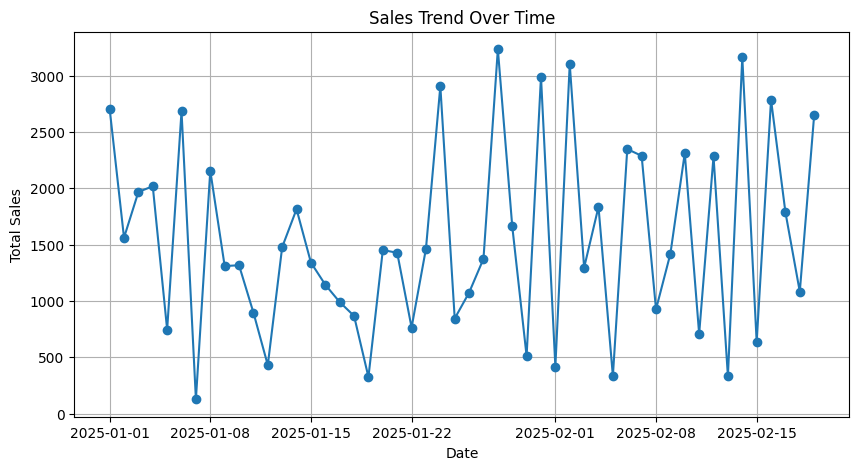

In [118]:
import matplotlib.pyplot as plt

# Aggregate sales by date
# daily_sales = sale.groupby("Date", as_index=False)["TotalAmount"].sum()
daily_sales = sale.groupby("Date", as_index=False)["TotalAmount"].sum()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(daily_sales["Date"], daily_sales["TotalAmount"], marker="o")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


Which day had the highest sales?

In [89]:
highest_sale = sale.groupby("Date", as_index=False)["TotalAmount"].sum()
day_hg_sale = highest_sale.sort_values("TotalAmount", ascending=False).head(1)
print("Day with the highest sale\n", day_hg_sale)

Day with the highest sale
           Date  TotalAmount
27  2025-01-28         3236


Find the total revenue in January vs February (if dates allow)

In [95]:
sale["Date"] = pd.to_datetime(sale["Date"])

sale["Month"] = sale["Date"].dt.month_name()

monthly_revenue = sale.groupby("Month", as_index=False)["TotalAmount"].sum()

print("Revenur in Jan vs Feb:\n", monthly_revenue[monthly_revenue["Month"].isin(["January", "February"])])



Revenur in Jan vs Feb:
       Month  TotalAmount
0  February        31714
1   January        45595
